# **Train Object Detection Model**

#### 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import xml.etree.ElementTree as xet

In [2]:
df =pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./images\N1.xml,1093,1396,645,727
1,./images\N100.xml,134,301,312,350
2,./images\N101.xml,31,139,128,161
3,./images\N102.xml,164,316,216,243
4,./images\N103.xml,813,1067,665,724


In [3]:
df['filepath'] = df['filepath'].apply(lambda x: x.replace('\\','/'))

In [4]:
filename = df['filepath'][0]
filename

'./images/N1.xml'

#### 2. Parse filename of image from XML

In [5]:
def getFilename(filename,images_folder='./images'):
    # read xml file
    # parse filename from xml file
    filename_image = xet.parse(filename).getroot().find('filename').text
    # join path with images folder
    filepath_image = os.path.join(images_folder,filename_image)
    return filepath_image

In [6]:
image_path = list(df['filepath'].apply(lambda x: getFilename(x, './images'))) # ./images is the folder name where image are present
image_path

['./images\\N1.jpeg',
 './images\\N100.jpeg',
 './images\\N101.jpeg',
 './images\\N102.jpeg',
 './images\\N103.jpeg',
 './images\\N104.jpeg',
 './images\\N105.jpeg',
 './images\\N106.jpeg',
 './images\\N107.jpeg',
 './images\\N108.jpeg',
 './images\\N109.jpeg',
 './images\\N11.jpeg',
 './images\\N110.jpeg',
 './images\\N111.jpeg',
 './images\\N112.jpeg',
 './images\\N113.jpeg',
 './images\\N114.jpeg',
 './images\\N116.jpeg',
 './images\\N117.jpeg',
 './images\\N118.jpeg',
 './images\\N119.jpeg',
 './images\\N12.jpeg',
 './images\\N120.jpeg',
 './images\\N121.jpeg',
 './images\\N122.jpeg',
 './images\\N123.jpeg',
 './images\\N124.jpeg',
 './images\\N126.jpeg',
 './images\\N127.jpeg',
 './images\\N128.jpeg',
 './images\\N129.jpeg',
 './images\\N130.jpeg',
 './images\\N131.jpeg',
 './images\\N132.jpeg',
 './images\\N133.jpeg',
 './images\\N134.jpeg',
 './images\\N135.jpeg',
 './images\\N136.jpeg',
 './images\\N137.jpeg',
 './images\\N138.jpeg',
 './images\\N139.jpeg',
 './images\\N14.jpeg

#### 3. verify image and output

In [7]:
file_path = image_path[0]
file_path

'./images\\N1.jpeg'

In [8]:
file_path = image_path[0]
img = cv2.imread(file_path)
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 4. **Data Preprocessing**

In [9]:
labels = df.iloc[:,1:].values
labels

array([[1093, 1396,  645,  727],
       [ 134,  301,  312,  350],
       [  31,  139,  128,  161],
       [ 164,  316,  216,  243],
       [ 813, 1067,  665,  724],
       [  66,  154,  166,  197],
       [ 360,  434,  174,  195],
       [ 137,  262,  249,  290],
       [ 207,  356,  174,  287],
       [ 184,  342,  220,  257],
       [ 148,  239,  250,  320],
       [ 131,  187,  130,  144],
       [ 183,  249,  211,  227],
       [  80,  239,  364,  402],
       [ 179,  347,  256,  290],
       [  39,  108,  129,  157],
       [  15,  200,   33,  126],
       [ 157,  316,  226,  278],
       [ 120,  249,  161,  202],
       [ 532,  852,  636,  706],
       [ 180,  559,  216,  314],
       [ 976, 1284,  669,  754],
       [ 647,  736,  332,  387],
       [ 311,  506,  324,  370],
       [ 342,  494,  243,  288],
       [  11,  246,   78,  165],
       [ 165,  328,  276,  324],
       [ 149,  399,  269,  327],
       [  24,  142,  209,  245],
       [  58,  221,  198,  271],
       [ 3

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from os.path import exists

labels = df.iloc[:,1:].values
data= []
output= []
for ind in range(len(image_path)):
    image = image_path[ind]
    print("path of the image", image)
    file_exists = exists(image)
    if file_exists:
        print('File Exists in the path')
    else:
        print('file doesnot exists in the path')


    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # normalization
    # normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # normalized output
    # -------------- append
    data.append(norm_load_image_arr)
    output.append(label_norm)

path of the image ./images\N1.jpeg
File Exists in the path
path of the image ./images\N100.jpeg
File Exists in the path
path of the image ./images\N101.jpeg
File Exists in the path
path of the image ./images\N102.jpeg
File Exists in the path
path of the image ./images\N103.jpeg
File Exists in the path
path of the image ./images\N104.jpeg
File Exists in the path
path of the image ./images\N105.jpeg
File Exists in the path
path of the image ./images\N106.jpeg
File Exists in the path
path of the image ./images\N107.jpeg
File Exists in the path
path of the image ./images\N108.jpeg
File Exists in the path
path of the image ./images\N109.jpeg
File Exists in the path
path of the image ./images\N11.jpeg
File Exists in the path
path of the image ./images\N110.jpeg
File Exists in the path
path of the image ./images\N111.jpeg
File Exists in the path
path of the image ./images\N112.jpeg
File Exists in the path
path of the image ./images\N113.jpeg
File Exists in the path
path of the image ./images\

In [11]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [12]:
X.shape,y.shape

((225, 224, 224, 3), (225, 4))

In [13]:
y.shape

(225, 4)

#### 5. Split data into train and test

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

### 6. Construct Deep Learning Model for Object Detection

In [15]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [29]:
# UsingInceptionResNetV2
inception_resnet = InceptionV3(weights="imagenet",include_top=False,input_tensor =Input(shape=(224,224,3)))
inception_resnet.trainable=False
headmodel =inception_resnet.output
headmodel =Flatten()(headmodel)
headmodel =Dense(500,activation ="relu")(headmodel)
headmodel =Dense(250,activation ="relu")(headmodel)
headmodel =Dense(4,activation ='sigmoid')(headmodel)
#MODEL
model =Model (inputs =inception_resnet.input , outputs =headmodel)

In [30]:
# complie model
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_203 (Conv2D)           │ (None, 111, 111, 32)      │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_203       │ (None, 111, 111, 32)      │              96 │ conv2d_203[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_203 (Activation)   │ (None, 111, 111, 32)      │               0 │ batch_normalization_203[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_204 (Conv2D)           │ (None, 109, 109, 32)      │           9,216 │ activation_203[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_204       │ (None, 109, 109, 32)      │              96 │ conv2d_204[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_204 (Activation)   │ (None, 109, 109, 32)      │               0 │ batch_normalization_204[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_205 (Conv2D)           │ (None, 109, 109, 64)      │          18,432 │ activation_204[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_205       │ (None, 109, 109, 64)      │             192 │ conv2d_205[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_205 (Activation)   │ (None, 109, 109, 64)      │               0 │ batch_normalization_205[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 54, 54, 64)        │               0 │ activation_205[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_206 (Conv2D)           │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_206       │ (None, 54, 54, 80)        │             240 │ conv2d_206[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_206 (Activation)   │ (None, 54, 54, 80)        │               0 │ batch_normalization_206[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_207 (Conv2D)           │ (None, 52, 52, 192)       │         138,24

 Total params: 47,529,538 (181.31 MB)

 Trainable params: 25,726,754 (98.14 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

### 7. Training Object Detection Model

In [31]:
from tensorflow.keras.callbacks import TensorBoard
tfb = TensorBoard('object_detection')

In [32]:
history = model.fit(x=x_train,y=y_train,batch_size=20,epochs=60,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 0.0536 - val_loss: 0.0399
Epoch 2/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 744ms/step - loss: 0.0367 - val_loss: 0.0319
Epoch 3/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 823ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 4/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 748ms/step - loss: 0.0252 - val_loss: 0.0283
Epoch 5/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 782ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 6/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 793ms/step - loss: 0.0195 - val_loss: 0.0264
Epoch 7/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 741ms/step - loss: 0.0166 - val_loss: 0.0251
Epoch 8/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 746ms/step - loss: 0.0151 - val_loss: 0.0243
Epoch 9/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 760ms/step - loss: 0.0117 - val_loss: 0.0241
Epoch 10/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 703ms/step - loss: 0.0113 - val_loss: 0.0235
Epoch 11/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 721ms/step - loss: 0.0092 - val_loss: 0.0228
Epoch 12/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 714ms/step - loss: 0.0091 - val_loss

In [20]:
model.save('./models/good_model2.keras')

<Axes: >

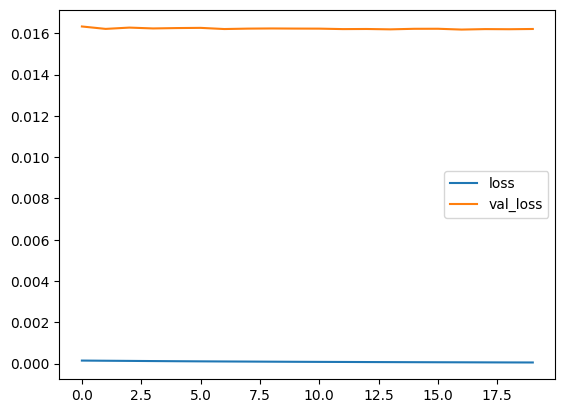

In [26]:
pd.DataFrame(history.history).plot(kind='line')

<Axes: >

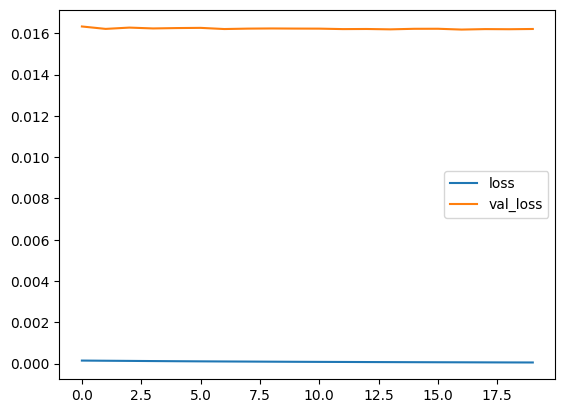

In [27]:
pd.DataFrame(history.history).plot(kind='line')


### END
---